In [ ]:
# Importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as iter
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import seaborn as sn
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importando Arquivo/ Corpus
news = pd.read_csv("/content/Compliado_falso _Verdadeiro.csv")
X = news['text']
y = news['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# Criando um pipeline que primeiro cria um pacote de palavras (depois de aplicar palavras irrelevantes) e depois aplica o modelo Multinomial Naive Bayes
# Classificador Naive Bayes para modelos multinomiais.

pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords.words('portuguese'), analyzer='word')),
                     ('nbmodel', MultinomialNB())])


In [ ]:
#Treinando os dados
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'à', 'ao', 'aos', 'aquela',
                                             'aquelas', 'aquele', 'aqueles',
                                             'aquilo', 'as', 'às', 'até', 'com',
                                             'como', 'da', 'das', 'de', 'dela',
                                             'delas', 'dele', 'deles', 'depois',
                                             'do', 'dos', 'e', 'é', 'ela',
                                             'elas', 'ele', 'eles', ...])),
                ('nbmodel', MultinomialNB())])

In [ ]:
# Prevendo o rótulo para os dados de teste

pred = pipeline.predict(X_test)


In [ ]:
# Verificando o desempenho do nosso modelo

print("Relatório de classificação")
print(classification_report(y_test, pred))


Relatório de classificação
              precision    recall  f1-score   support

        FAKE       0.80      0.67      0.73        12
        REAL       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



In [ ]:
print("Valor da matriz de confusão")
array = confusion_matrix(y_test, pred)
print(array)


Valor da matriz de confusão
[[8 4]
 [2 6]]


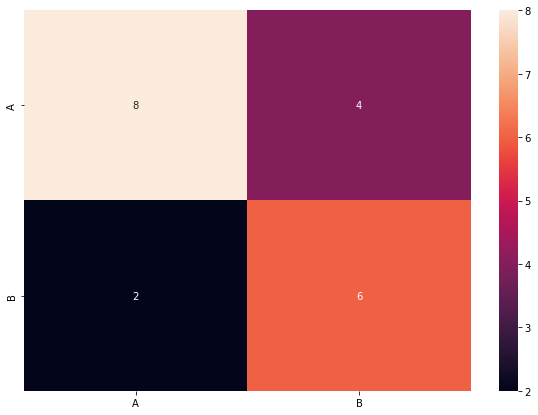

In [ ]:
## Mapa de Calor

df_cm = pd.DataFrame(array, index=[i for i in "AB"],
                     columns=[i for i in "AB"])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True)


In [ ]:
with open('model.pickle', 'wb') as handle:
    pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='matriz de confusão',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("matriz de confusão Normalizada")
    else:
        print('matriz de confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




In [ ]:
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)


matriz de confusão, sem normalização
[[8 4]
 [2 6]]


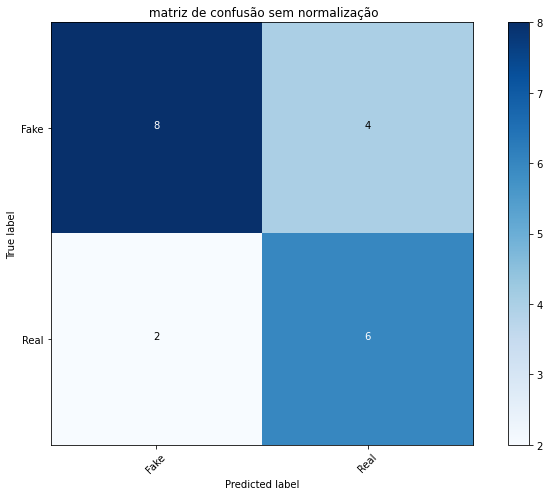

In [ ]:
plt.figure(figsize=(10, 7))
plot_confusion_matrix(cnf_matrix, classes=['Fake', 'Real'],
                      title=' matriz de confusão sem normalização')
